In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import DBSCAN
sns.set()

In [2]:
df = pd.read_json(r'E:\Data Scientist\Projects\Natural-Language-Processing-master\Ashish Patel\Contact Tracing with Machine Learning\livedata.json')
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


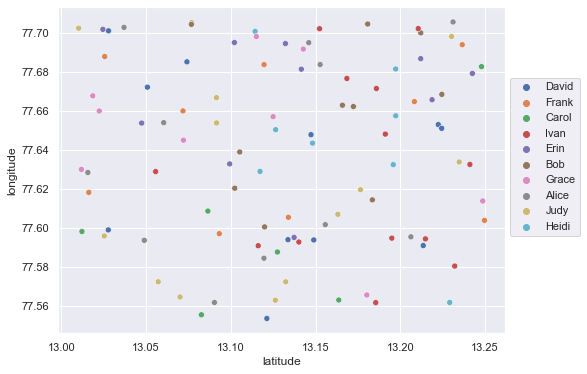

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'latitude', y = 'longitude', data=df, hue ='id')
plt.legend(bbox_to_anchor = [1, 0.8])
plt.show()

In [5]:
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples=2, metric='haversine' )
model.fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

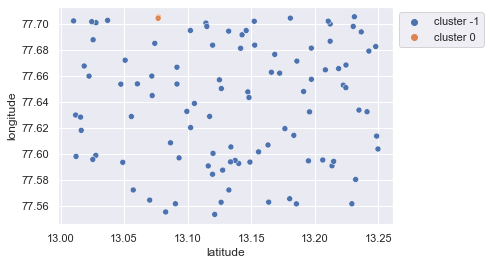

In [6]:
labels = model.labels_
sns.scatterplot(x = df['latitude'], y = df['longitude'], hue=[ 'cluster {}'.format(x)for x in labels])
plt.legend(bbox_to_anchor = [1,1])
plt.show()

In [7]:
def get_infected_names(input_name):

    input_name_clusters =[]
    for i in range(len(df)):
        if df['id'][i]==input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
                
                
    infected_names = [] 
    for cluster in input_name_clusters:
        if cluster != -1:
            id_in_cluster = df.loc[df['cluster']==cluster, 'id']
            for i in id_in_cluster:
                if i not in infected_names:
                    infected_names.append(i)
                #member_id = df.iloc[id_in_cluster][i]
                #if (member_id not in infected_names) and (member_id != input_name):
                    #infected_names.append(member_id)
                else:
                    pass
        
    return infected_names
                    


In [8]:
print(get_infected_names('Bob'))


['Judy', 'Bob']


In [9]:
print(get_infected_names('Alice'))

[]


In [10]:
df.loc[df['cluster']==0]

,id,timestamp,latitude,longitude,cluster
45,Judy,2020-07-04 15:35:30,13.077005,77.705144,0
89,Bob,2020-07-04 15:35:30,13.076776,77.704233,0


In [11]:
epsilon = 0.0024384 # a radial distance of 8 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples=2, metric='haversine' )
model.fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

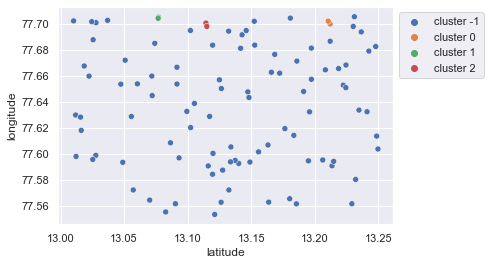

In [12]:
labels = model.labels_
sns.scatterplot(x = df['latitude'], y = df['longitude'], hue=[ 'cluster {}'.format(x)for x in labels])
plt.legend(bbox_to_anchor = [1,1])
plt.show()

In [13]:
def get_infected_names(input_name):

    input_name_clusters =[]
    for i in range(len(df)):
        if df['id'][i]==input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
                
                
    infected_names = [] 
    for cluster in input_name_clusters:
        if cluster != -1:
            id_in_cluster = df.loc[df['cluster']==cluster, 'id']
            for i in id_in_cluster:
                if i not in infected_names:
                    infected_names.append(i)
                #member_id = df.iloc[id_in_cluster][i]
                #if (member_id not in infected_names) and (member_id != input_name):
                    #infected_names.append(member_id)
                else:
                    pass
            
    return infected_names
                                        

In [14]:
print(get_infected_names('Bob'))

['Bob', 'Ivan', 'Judy']


In [15]:
print(get_infected_names('Heidi'))

['Heidi', 'Grace']


In [16]:
print(get_infected_names('Alice'))

[]


In [132]:
df.loc[df['cluster']==2, 'id']

61    Heidi
97    Grace
Name: id, dtype: object

In [17]:
df.loc[df['cluster']==1, 'id']

45    Judy
89     Bob
Name: id, dtype: object

In [18]:
df.loc[df['cluster']==0, 'id']

13     Bob
73    Ivan
Name: id, dtype: object